In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\singh\\Downloads\\Real_fake_news (1).csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [5]:
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [7]:
df.isnull()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4865,False,False,False,False,False,False,False,False
4866,False,False,False,False,False,False,False,False
4867,False,False,False,False,False,False,False,False
4868,False,False,False,False,False,False,False,False


In [8]:
df.shape


(4870, 8)

In [9]:
# Dropping the unnecessary columns
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [11]:
# Dropping the rows with null values
df.dropna()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...
4865,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [12]:
#FInding rows that have duplicate values
df[df.duplicated(keep = 'last')] 

,author,statement,source,target,BinaryTarget,BinaryNumTarget
1406,Sue Owen,Says Milken Institute rated San Antonio as nat...,Julián Castro,True,REAL,1
4249,Daniel Funke,Says a series of photos show Iranian rockets b...,Facebook posts,False,FAKE,0


In [13]:
#Removing the duplicates
df = df.drop_duplicates(subset = None, keep ='first')

In [14]:
df.BinaryNumTarget.value_counts()

0    2434
1    2434
Name: BinaryNumTarget, dtype: int64

In [15]:
# Defining numerical and categorical variables
num_atr=[]

cat_atr=['author' , 'statement' , 'source']

In [16]:
# Correlation Matrix
df.corr()

,target,BinaryNumTarget
target,1.0,1.0
BinaryNumTarget,1.0,1.0


In [17]:
df.dtypes

author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [18]:
df.columns

Index(['author', 'statement', 'source', 'target', 'BinaryTarget',
       'BinaryNumTarget'],
      dtype='object')

In [36]:
# KNN Classification Algorithm

In [37]:
from sklearn.model_selection import train_test_split
X= df.drop(['BinaryNumTarget', 'BinaryTarget', 'target'], axis=1)
y= df['BinaryNumTarget']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [39]:
X_train[cat_atr].head()

,author,statement,source
2175,20,627,561
4735,171,637,617
1151,110,611,294
3873,54,2788,1123
1529,119,957,766


In [40]:
Xtr = X_train[cat_atr]
Xtr.shape 

(3407, 3)

In [41]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [42]:
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

Xtr1 = X_test[cat_atr] 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(1461, 3)

In [43]:
y_pred = knn.predict(Xtr1

SyntaxError: unexpected EOF while parsing (<ipython-input-43-a73e8946696e>, line 1)

In [44]:
confusion_matrix(y_test, y_pred)

array([[ 69, 660],
       [135, 597]], dtype=int64)

In [28]:
Xtr = X_train[cat_atr]
Xtr.shape 

(3407, 3)

In [45]:
from sklearn.metrics import accuracy_score

In [30]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [46]:
accuracy_score(y_test, y_pred)

0.45585215605749485

In [47]:
from sklearn.metrics import precision_recall_fscore_support

In [48]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.33823529, 0.47494033]),
 array([0.09465021, 0.81557377]),
 array([0.14790997, 0.60030166]),
 array([729, 732], dtype=int64))

In [49]:
from sklearn.metrics import precision_score

In [50]:
precision_score(y_test, y_pred)

0.47494033412887826

In [51]:
from sklearn.metrics import recall_score

In [52]:
recall_score(y_test, y_pred)

0.8155737704918032

In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(y_test, y_pred)

0.6003016591251886

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

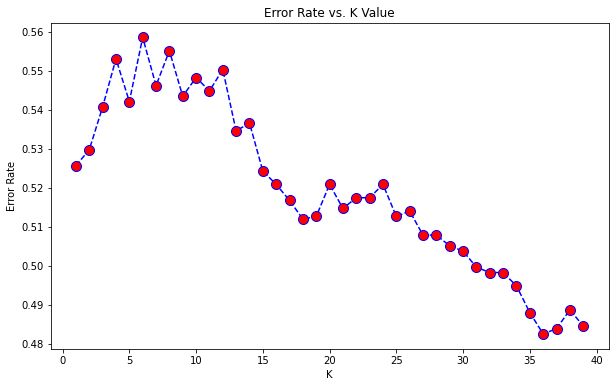

Minimum error:- 0.48254620123203285 at K = 36


In [55]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [56]:
knn = KNeighborsClassifier(n_neighbors=36, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=36)

In [57]:
y_pred = knn.predict(Xtr1)

In [58]:
accuracy_score(y_test, y_pred)

0.5174537987679672